<a href="https://colab.research.google.com/github/Pr1styu/NER_with_BERT/blob/main/NER_with_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 44.5 MB/s 
     |████████████████████████████████| 596 kB 66.0 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 3.3 MB 43.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.1.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.2.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.3.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.4.ner.tsv.gz

--2021-10-31 19:16:42--  http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.1.ner.tsv.gz
Resolving hlt.sztaki.hu (hlt.sztaki.hu)... 195.111.2.4
Connecting to hlt.sztaki.hu (hlt.sztaki.hu)|195.111.2.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42225789 (40M) [application/x-gzip]
Saving to: ‘huwiki.1.ner.tsv.gz’

huwiki.1.ner.tsv.gz 100%[===================>]  40.27M  15.0MB/s    in 2.7s    

2021-10-31 19:16:45 (15.0 MB/s) - ‘huwiki.1.ner.tsv.gz’ saved [42225789/42225789]

--2021-10-31 19:16:46--  http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.2.ner.tsv.gz
Resolving hlt.sztaki.hu (hlt.sztaki.hu)... 195.111.2.4
Connecting to hlt.sztaki.hu (hlt.sztaki.hu)|195.111.2.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28227004 (27M) [application/x-gzip]
Saving to: ‘huwiki.2.ner.tsv.gz’

huwiki.2.ner.tsv.gz 100%[===================>]  26.92M  12.9MB/s    in 2.1s    

2021-10-31 19:16:48 (12.9 MB/s) - ‘huwiki.2.ner.tsv.gz’ saved [28227004/2

In [ ]:
!gunzip huwiki.1.ner.tsv.gz
!gunzip huwiki.2.ner.tsv.gz
!gunzip huwiki.3.ner.tsv.gz
!gunzip huwiki.4.ner.tsv.gz

In [ ]:
import csv
import pandas as pd
from tqdm.auto import tqdm
sep = '\t'

csv.field_size_limit(100000000)

131072

In [ ]:
print('Reading data!')
tsv_file = open("huwiki.1.ner.tsv", encoding='utf-8')
data = tsv_file.read().split("\n")
tsv_file = open("huwiki.2.ner.tsv", encoding='utf-8')
data +=tsv_file.read().split("\n")
tsv_file = open("huwiki.3.ner.tsv", encoding='utf-8')
data += tsv_file.read().split("\n")
tsv_file = open("huwiki.4.ner.tsv", encoding='utf-8')
data += tsv_file.read().split("\n")
print('Reading data finished!')


# Making dataset
output = open('data.csv', 'w', encoding='utf-8')
i = 0
sentence = 0
read_tsv = []
print('Splitting rows!', len(read_tsv))
for row in tqdm(data):
    read_tsv.append(row.split(sep))
print('Splitting rows finished!', len(read_tsv))

Reading data!
Reading data finished!
Splitting rows! 0


  0%|          | 0/20408553 [00:00<?, ?it/s]

Splitting rows finished! 20408553


In [ ]:
import os
print('Making output data!')
out = []
out_sentences = []
os.makedirs('./sentences', exist_ok=True)
file_count = 1
for row in tqdm(read_tsv):

    if len(row) == 6:
        output.write(str(i) + sep
                      + str(sentence) + sep
                      + row[0] + sep
                      + row[5] + '\n')
        i += 1
        out.append(row[0])
    elif len(row) == 1:
        sentence += 1
        out_sentences.append(' '.join(out))
        out = []
        if(sentence % 5000 == 0):
          with open(f'./sentences/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(out_sentences))
            out_sentences = []
            file_count += 1
read_tsv = []

with open(f'./sentences/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(out_sentences))
out_sentences = []
print('Making output data finished!', i, len(read_tsv))
output.close()

Making output data!


  0%|          | 0/20408553 [00:00<?, ?it/s]

Making output data finished! 19108597 0


In [ ]:
from pathlib import Path
paths = [str(x) for x in Path('./sentences').glob('**/*.txt')]
paths[:5]

['sentences/text_189.txt',
 'sentences/text_71.txt',
 'sentences/text_56.txt',
 'sentences/text_213.txt',
 'sentences/text_72.txt']

In [ ]:
data = pd.read_csv("data.csv", sep=sep, header=None, engine='python', encoding="UTF-8", error_bad_lines=False)

In [ ]:
data.rename(columns = {data.columns[0]: 'Index'},  inplace=True)
data.rename(columns = {data.columns[1]: 'Sentence'},  inplace=True)
data.rename(columns = {data.columns[2]: 'Word'},  inplace=True)
data.rename(columns = {data.columns[3]: 'Tag'},  inplace=True)

In [ ]:
data.head()

,Index,Sentence,Word,Tag
0,0,0,A,O
1,1,0,céljuk,O
2,2,0,",",O
3,3,0,hogy,O
4,4,0,biztosítsák,O


# Data visualization

The following two figures show the distribution of tags and the distribution of entity types. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


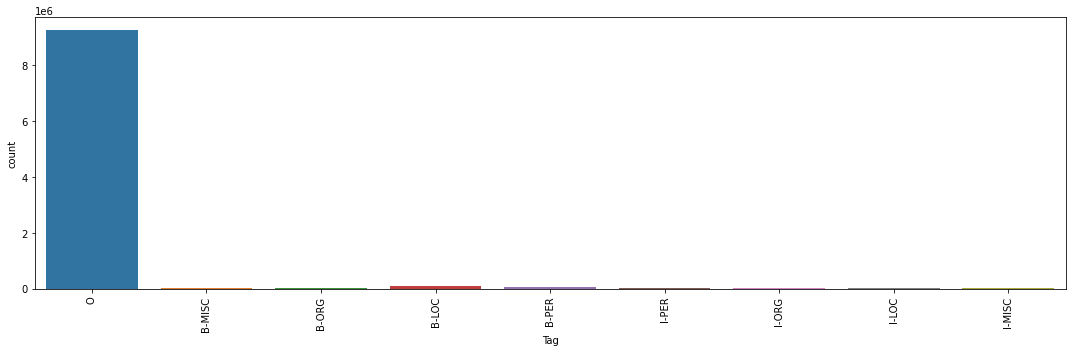

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


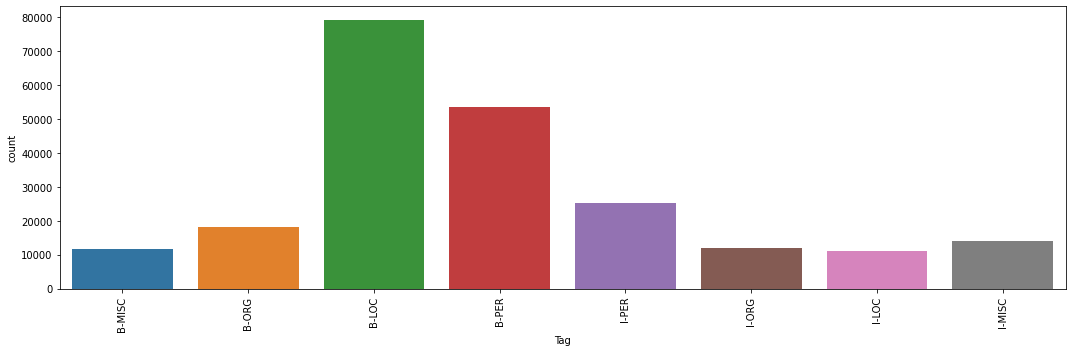

In [ ]:

plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data.loc[data['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [ ]:
tag_list=data.Tag.unique()
label_map = {label: i for i, label in enumerate(tag_list)}

# Splitting dataset into train, validation and test datasets

In [ ]:
nb_samples = len(data)
valid_split = 0.2
test_split = 0.1

X_train = data[0:int(nb_samples*(1-valid_split-test_split))]
X_valid = data[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
X_test  = data[int(nb_samples*(1-test_split)):]

print(len(data))
print(len(X_train))
print(len(X_test))
print(len(X_valid))


9474226
6631958
947423
1894845


## Training the tokenizer

In [ ]:
from tokenizers import BertWordPieceTokenizer

tokenizer = BertWordPieceTokenizer(
    clean_text=True,
    handle_chinese_chars=False,
    strip_accents=False,
    lowercase=False,
)



In [ ]:
tokenizer.train(files=paths, vocab_size=30_000, min_frequency=2,
                limit_alphabet=1000, wordpieces_prefix='##',
                special_tokens=[
                    '[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]'])

In [ ]:
os.mkdir('./bert-tk')
tokenizer.save_model('./bert-tk', 'bert-tk')

['./bert-tk/bert-tk-vocab.txt']

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('./bert-tk/bert-tk-vocab.txt')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1645: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  FutureWarning,


## Aggregating sentences and tags

In [ ]:
agg_func = lambda s: [ [w,t] for w,t in zip(s["Word"].values.tolist(),s["Tag"].values.tolist())]

In [ ]:
def isNaN(string):
    return string != string

In [ ]:
x_train_grouped = X_train.groupby("Sentence").apply(agg_func)
x_val_grouped = X_valid.groupby("Sentence").apply(agg_func)
x_test_grouped = X_test.groupby("Sentence").apply(agg_func)

In [ ]:
x_train_sentences = [[s[0] for s in sent] for sent in x_train_grouped.values]
x_val_sentences = [[s[0] for s in sent] for sent in x_val_grouped.values]
x_test_sentences = [[s[0] for s in sent] for sent in x_test_grouped.values]

In [ ]:
x_train_tags = [[t[1] for t in tag] for tag in x_train_grouped.values]
x_val_tags = [[t[1] for t in tag] for tag in x_val_grouped.values]
x_test_tags = [[t[1] for t in tag] for tag in x_test_grouped.values]

## Tokenizing the inputs

In [ ]:
from keras.preprocessing.sequence import pad_sequences
max_seq_length =128
pad_token_label_id = 0
def convert_to_input(sentences,tags):
  input_id_list,attention_mask_list,token_type_id_list=[],[],[]
  label_id_list=[]
  
  for x,y in tqdm(zip(sentences,tags),total=len(tags)):
    try:
      tokens = []
      label_ids = []

      for word, label in zip(x, y):
        if(isNaN(word)):
          word = 'nan'
        word_tokens = tokenizer.tokenize(word)
        tokens.extend(word_tokens)
        label_ids.extend([label_map[label]] + [pad_token_label_id] * (len(word_tokens) - 1))

    
      special_tokens_count =  2
      if len(tokens) > max_seq_length - special_tokens_count:
        tokens = tokens[: (max_seq_length - special_tokens_count)]
        label_ids = label_ids[: (max_seq_length - special_tokens_count)]

      label_ids = [pad_token_label_id]+label_ids+[pad_token_label_id]
      inputs = tokenizer.encode_plus(tokens,add_special_tokens=True, max_length=max_seq_length, truncation=True,is_split_into_words=True)

      input_ids, token_type_ids = inputs["input_ids"], inputs["token_type_ids"]
      attention_masks = [1] * len(input_ids)

      attention_mask_list.append(attention_masks)
      input_id_list.append(input_ids)
      token_type_id_list.append(token_type_ids)

      label_id_list.append(label_ids)
    except TypeError as e:
      print(x)
  return input_id_list,token_type_id_list,attention_mask_list,label_id_list


In [ ]:
input_ids_train,token_ids_train,attention_masks_train,label_ids_train=convert_to_input(x_train_sentences,x_train_tags)

  0%|          | 0/443277 [00:00<?, ?it/s]

In [ ]:
input_ids_val,token_ids_val,attention_masks_val,label_ids_val=convert_to_input(x_val_sentences,x_val_tags)

  0%|          | 0/135409 [00:00<?, ?it/s]

In [ ]:
input_ids_test,token_ids_test,attention_masks_test,label_ids_test=convert_to_input(x_test_sentences,x_test_tags)

  0%|          | 0/71339 [00:00<?, ?it/s]

## Padding inputs

In [ ]:
input_ids_train = pad_sequences(input_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
token_ids_train = pad_sequences(token_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
attention_masks_train = pad_sequences(attention_masks_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
label_ids_train = pad_sequences(label_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")

In [ ]:
input_ids_val = pad_sequences(input_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
token_ids_val = pad_sequences(token_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
attention_masks_val = pad_sequences(attention_masks_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
label_ids_val = pad_sequences(label_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")

In [ ]:
input_ids_test = pad_sequences(input_ids_test,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
token_ids_test = pad_sequences(token_ids_test,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
attention_masks_test = pad_sequences(attention_masks_test,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
label_ids_test = pad_sequences(label_ids_test,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")

## Creating Tensorflow datasets

In [ ]:
import tensorflow as tf

In [ ]:
def example_to_features(input_ids,attention_masks,token_type_ids,y):
  return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids},y

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((input_ids_train,attention_masks_train,token_ids_train,label_ids_train)).map(example_to_features).batch(1)

val_ds = tf.data.Dataset.from_tensor_slices((input_ids_val,attention_masks_val,token_ids_val,label_ids_val)).map(example_to_features).batch(1)

test_ds=tf.data.Dataset.from_tensor_slices((input_ids_test,attention_masks_test,token_ids_test,label_ids_test)).map(example_to_features).batch(1)

In [ ]:
for x,y in test_ds.take(1):
  print(x,y)

{'input_ids': <tf.Tensor: shape=(1, 128), dtype=int64, numpy=
array([[    2, 11224,    17,  2282,  2986,    18,     3,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 